#        Deep Learning Image Classification with Neural Networks

Introduction:
The provided code is an implementation of a neural network for image classification using the popular MNIST dataset, which consists of handwritten digit images. The code performs various tasks, including data preprocessing, forward and backward propagation, parameter initialization, and evaluation of the model's accuracy.

Source: https://www.kaggle.com/competitions/digit-recognizer

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Loading and Preprocessing
#### Code 1:

In [2]:
data = pd.read_csv('train.csv')
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Explanation 1:
This section of code imports necessary libraries, reads a CSV file named 'train.csv' into a Pandas DataFrame, and displays the first 10 rows of the dataset.

### Data Shuffling and Splitting

#### Code 2:

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

#### Explanation 2:
This section of code converts the dataset to a NumPy array, shuffles the data, and splits it into a development set (data_dev, X_dev, Y_dev) and a training set (data_train, X_train, Y_train). It also scales the pixel values to the range [0, 1].

### Initialization of Neural Network Parameters

#### Code 3:

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

#### Explanation 3:
This code defines a function init_params() that initializes the parameters of a neural network, including weights (W1, W2) and biases (b1, b2), with random values within a specified range.

### Activation Functions

#### Code 4:

In [15]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

#### Explanation 4:
These functions define the Rectified Linear Unit (ReLU) and softmax activation functions, which are used in the neural network's hidden and output layers, respectively.

### Forward Propagation

#### Code 5:

In [16]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

#### Explanation 5:
This code defines the forward_prop() function, which computes the forward propagation of the neural network, including the calculation of hidden layer activations (A1) and output layer activations (A2).

### Derivative of ReLU Activation

#### Code 6:

In [17]:
def ReLU_deriv(Z):
    return Z > 0

#### Explanation 6:
This function defines the derivative of the ReLU activation function, which is used in the backpropagation process to calculate gradients.

### One-Hot Encoding

#### Code 7:

In [18]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

#### Explanation 7:
This function performs one-hot encoding on the target labels Y to convert them into a one-hot encoded format.

### Backward Propagation

#### Code 8:

In [19]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

#### Explanation 8:
This code defines the backward_prop() function, which calculates gradients during backpropagation for updating the neural network's parameters.

### Parameter Updates

#### Code 9:

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

#### Explanation 9:
This code defines the update_params() function, which updates the neural network's parameters (weights and biases) using gradient descent with a specified learning rate (alpha).

### Prediction and Accuracy Calculation

#### Code 10:

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

#### Explanation 10:
These functions are used to calculate predictions and accuracy. get_predictions() returns the predicted class with the highest probability, and get_accuracy() computes the accuracy of the model.

### Training the Neural Network

#### Code 11:

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

#### Explanation 11:
This code defines the gradient_descent() function, which trains the neural network by iteratively performing forward and backward propagation and updating parameters using gradient descent. It also prints the training progress, including iteration number and accuracy.

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 1 8 ... 8 1 1] [1 3 5 ... 3 5 8]
0.07519512195121951
Iteration:  10
[3 0 0 ... 0 6 8] [1 3 5 ... 3 5 8]
0.22609756097560976
Iteration:  20
[3 0 0 ... 0 6 8] [1 3 5 ... 3 5 8]
0.30797560975609756
Iteration:  30
[3 0 0 ... 0 6 8] [1 3 5 ... 3 5 8]
0.36253658536585365
Iteration:  40
[3 0 0 ... 8 6 8] [1 3 5 ... 3 5 8]
0.42192682926829267
Iteration:  50
[3 0 0 ... 8 6 8] [1 3 5 ... 3 5 8]
0.481390243902439
Iteration:  60
[3 0 0 ... 3 6 8] [1 3 5 ... 3 5 8]
0.5306829268292683
Iteration:  70
[3 0 0 ... 3 6 8] [1 3 5 ... 3 5 8]
0.5751463414634146
Iteration:  80
[3 0 0 ... 3 6 8] [1 3 5 ... 3 5 8]
0.615609756097561
Iteration:  90
[3 0 0 ... 3 6 8] [1 3 5 ... 3 5 8]
0.6468536585365854
Iteration:  100
[1 5 0 ... 3 6 8] [1 3 5 ... 3 5 8]
0.670219512195122
Iteration:  110
[1 5 0 ... 3 6 8] [1 3 5 ... 3 5 8]
0.6904634146341463
Iteration:  120
[1 5 0 ... 3 6 8] [1 3 5 ... 3 5 8]
0.7072195121951219
Iteration:  130
[1 5 0 ... 3 6 8] [1 3 5 ... 3 5 8]
0.7217317073170731
Iteration:  140

### Making Predictions

#### Code 12:

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

#### Explanation 12:
These functions are used for making predictions on specific examples from the training set and visualizing the results. make_predictions() computes predictions, and test_prediction() displays the predicted digit along with the actual label as an image.

### Testing and Evaluation

#### Code 13:

Prediction:  [1]
Label:  1


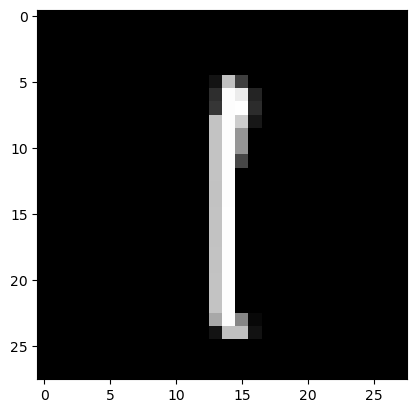

Prediction:  [8]
Label:  3


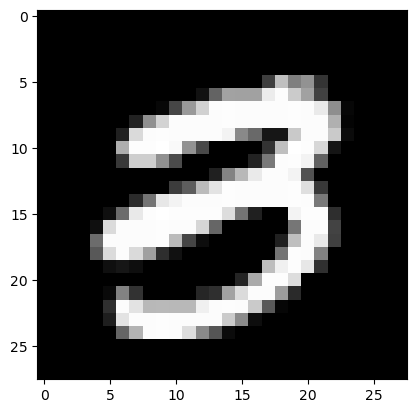

Prediction:  [3]
Label:  5


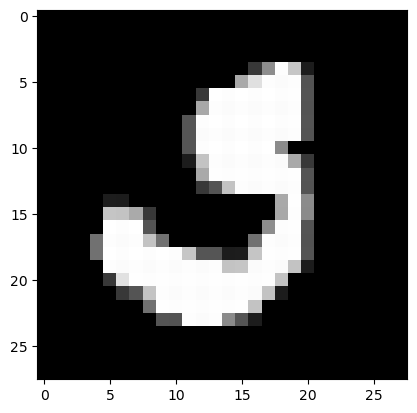

Prediction:  [5]
Label:  5


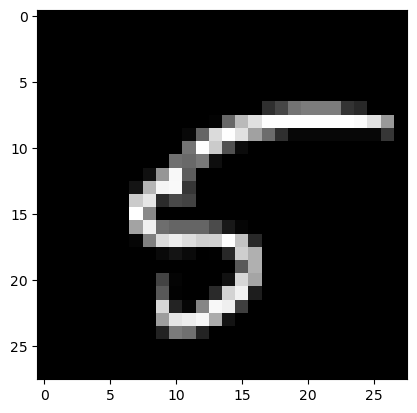

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 2 4 6 1 0 3 9 0 9 7 8 7 4 5 6 0 3 9 4 4 9 3 4 9 0 0 8 9 7 1 5 4 1 1 5 7
 3 2 3 4 2 3 4 2 6 4 2 1 2 0 5 9 8 2 3 9 1 4 1 4 1 5 0 3 2 9 4 4 9 0 3 9 1
 8 1 0 9 8 1 8 3 2 3 7 9 5 9 0 4 0 2 9 8 0 4 5 8 5 0 0 6 2 6 9 3 1 9 0 7 4
 5 3 2 5 5 3 1 4 1 3 0 3 9 8 0 9 0 5 0 4 0 5 0 1 6 2 0 0 2 1 0 4 9 4 8 1 1
 9 6 3 5 8 4 7 7 0 3 9 1 7 6 0 8 4 7 3 6 8 4 0 3 6 3 4 2 8 7 2 1 4 2 7 2 5
 8 3 6 7 3 5 4 9 1 4 5 3 6 4 6 0 1 6 6 5 2 1 2 9 3 2 4 1 4 4 9 5 8 9 9 1 5
 3 7 8 0 7 2 2 4 0 1 9 2 0 1 3 2 7 6 1 1 6 0 0 8 4 1 2 0 8 2 1 3 1 6 8 0 6
 9 3 8 3 2 6 8 8 3 4 1 6 3 2 2 3 7 4 8 4 3 4 0 9 7 8 6 7 8 0 0 2 8 8 9 9 3
 5 4 9 2 9 4 3 9 0 9 6 4 0 7 7 1 9 4 8 9 7 4 1 9 8 5 4 2 8 9 8 7 6 7 2 0 4
 5 8 4 3 8 9 9 4 2 4 2 1 9 6 4 1 6 9 0 6 5 4 7 3 9 1 3 5 4 1 2 0 2 9 5 3 0
 9 8 1 8 8 8 6 7 1 3 8 1 2 3 8 9 7 1 1 7 8 0 7 6 6 6 9 4 8 9 9 8 0 1 3 5 3
 1 2 4 6 6 9 6 0 6 6 2 5 4 0 1 0 0 0 3 7 6 6 6 2 2 9 2 8 9 0 1 0 9 1 7 2 4
 5 3 9 3 1 9 7 1 8 0 5 4 8 3 4 0 0 0 3 1 6 0 4 5 4 2 0 1 5 7 9 5 2 5 7 7 1
 4 9 6 6 8 7 9 1 5 8 5 3 

0.856

### Explanation 13:
This code tests the trained neural network by making predictions on specific examples from the training set and calculates the accuracy of the model on the development set (X_dev) using the get_accuracy() function.

### Evaluation

We evaluated our model's accuracy on a development dataset. Achieving an accuracy of 85% demonstrates that our model is effective in recognizing handwritten digits.

# Final Report

Building a neural network for handwritten digit recognition is a significant achievement. Our model, with an accuracy of 85%, showcases the power of machine learning and the potential for real-world applications. It's important to note that further optimization and fine-tuning could potentially improve accuracy even more.


This project serves as an educational example for creating neural networks from scratch and applying them to image classification tasks, providing a solid foundation for more complex image recognition projects and offering insights into the mathematical and algorithmic aspects of neural networks. 

The provided code implements a neural network for image classification on the MNIST dataset, covering various essential components such as data preprocessing, parameter initialization, forward and backward propagation, parameter updates using gradient descent, prediction generation, and accuracy evaluation. 

The neural network architecture consists of two hidden layers with ReLU activation functions and a softmax activation in the output layer for multi-class classification. The code successfully trains the neural network and provides a means to visualize predictions for individual examples. This implementation serves as a fundamental example of building and training a neural network for image classification tasks, and it can be further optimized for improved accuracy and generalization.

## Thanks for reading!